Import the required libraries Numpy, pandas and matplotlib.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

Read the two CSV files, which contain data on the user's details and the number of calories they burned.

In [2]:
exercise = pd.read_csv('exercise.csv')
calories = pd.read_csv('calories.csv')

In [3]:
exercise.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8


In [4]:
calories.head()

,User_ID,Calories
0,14733363,231.0
1,14861698,66.0
2,11179863,26.0
3,16180408,71.0
4,17771927,35.0


Merging the two datasets using the column user_id.

In [5]:
df = pd.merge(exercise, calories, on = 'User_ID')

In [6]:
df['Intercept'] = 1

In [7]:
df.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories,Intercept
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0,1
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0,1
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0,1
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0,1
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0,1


Visualizing the effect of the duration of exercise on calories burned.

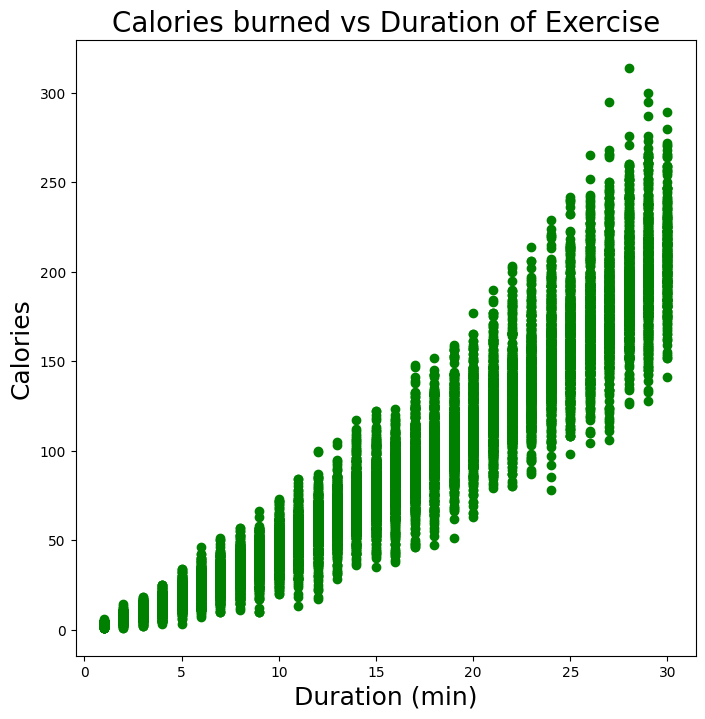

In [8]:
plt.figure(figsize=(8, 8))
plt.plot(df['Duration'], df['Calories'], 'go');
plt.xlabel('Duration (min)', size = 18); plt.ylabel('Calories', size = 18);
plt.title('Calories burned vs Duration of Exercise', size = 20);

In [9]:
X = df.loc[:, ['Intercept', 'Duration']]
y = df.loc[:, 'Calories']

Initially, without utilising any libraries, implement the linear regression by using the following function.

In [10]:
def linear_regression(X,y):
    _coeffs = np.matmul(np.matmul(np.linalg.inv(np.matmul(X.T, X)), X.T), y)
    return _coeffs

by_hand_coefs = linear_regression(X.values, y.values)
print('Intercept without using library:', by_hand_coefs[0])
print('Slope without using library: ', by_hand_coefs[1])

Intercept without using library: -21.859656399672385
Slope without using library:  7.172883837907462


Plotting the datasets and the function which was defined above

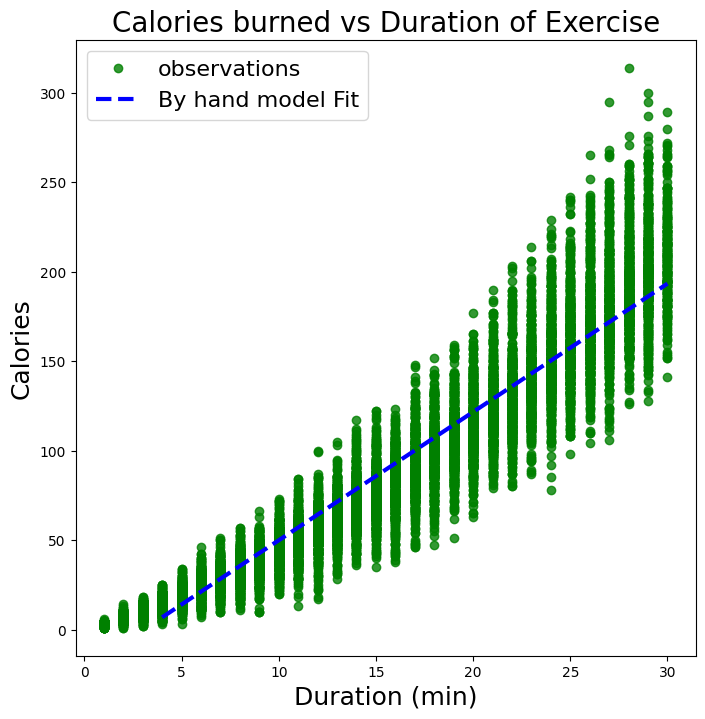

In [17]:
xs = np.linspace(4, 30, 1000)
ys = by_hand_coefs[0] + by_hand_coefs[1] * xs

plt.figure(figsize=(8, 8))

plt.plot(df['Duration'], df['Calories'], 'go',label = 'observations', alpha = 0.8);
plt.xlabel('Duration (min)', size = 18); plt.ylabel('Calories', size = 18);
plt.plot(xs, ys, 'b--', label = 'By hand model Fit', linewidth = 3)
plt.legend(prop={'size': 16})
plt.title('Calories burned vs Duration of Exercise', size = 20);

In [13]:
print(f'Exercising for 35.5 minutes will burn an estimated \
{np.round((by_hand_coefs[0] + by_hand_coefs[1] * 35.5), 2)} calories')

Exercising for 35.5 minutes will burn an estimated 232.78 calories


Implementing linear regression with the help of the library

In [14]:
from sklearn.linear_model import LinearRegression

linear_regression = LinearRegression()

linear_regression.fit(np.array(X.Duration).reshape(-1, 1), y)
print('Intercept using library:', linear_regression.intercept_)
print('Slope using library:', linear_regression.coef_[0])

Intercept using library: -21.859656399672318
Slope using library: 7.172883837907464


Plotting the datasets and the model trained using the LinearRegression library.
As we can see, the model parameters that were determined using the function are very similar to the model parameters determined using the regression model.

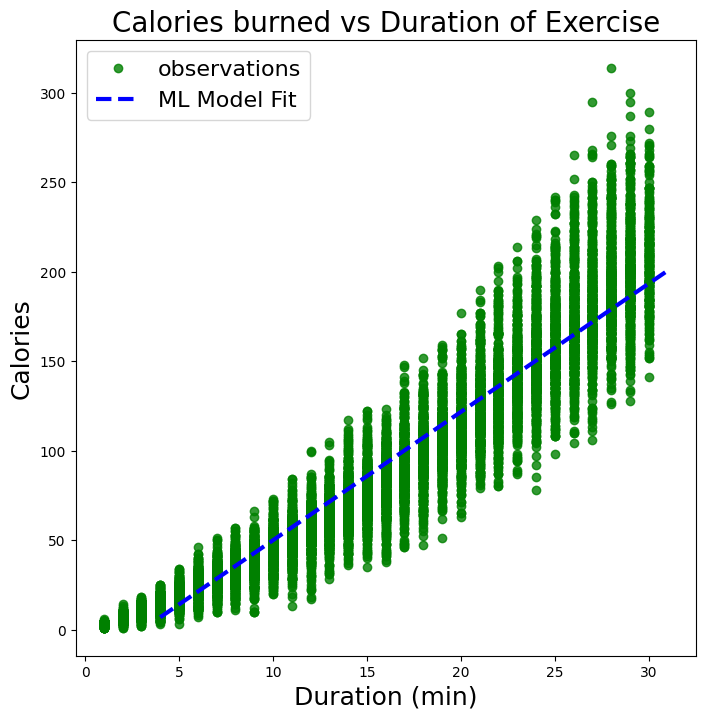

In [18]:
xs = np.linspace(4, 31, 1000)
ys = linear_regression.intercept_ + linear_regression.coef_[0] * xs

plt.figure(figsize=(8, 8))

plt.plot(df['Duration'], df['Calories'], 'go',label = 'observations', alpha = 0.8);
plt.xlabel('Duration (min)', size = 18); plt.ylabel('Calories', size = 18);
plt.plot(xs, ys, 'b--', label = 'ML Model Fit', linewidth = 3)
plt.legend(prop={'size': 16})
plt.title('Calories burned vs Duration of Exercise', size = 20);

Calories burned during the process are predicted using the input duration in minutes.

In [21]:
duration = 47.5
print(f'Exercising for 35.5 minutes will burn an estimated \
{np.round((linear_regression.intercept_ + linear_regression.coef_[0] * duration), 2)} calories')

Exercising for 35.5 minutes will burn an estimated 318.85 calories
